http://www.fsma.edu.br/si/edicao4/FSMA_SI_2009_2_Tutorial.pdf
http://www.lbd.dcc.ufmg.br/colecoes/enia/2005/061.pdf

# Conteúdos

## Técnicas e Algoritmos
* Partitional (K-means)
* Hierarchical (Hierarchical Agglomerative Clustering)
* Density (DBScan)
* Self-organizing (SOM)

## Métricas de Avaliação
* V-Measure Score (Homogeneity and Completeness)
* Silhouette Score
* Adjusted Rand Index (ARI)

## Introdução

Análise de agrupamento, ou clustering, é o nome dado para o grupo de técnicas computacionais cujo propósito consiste em separar objetos em **grupos**, baseando-se nas características que estes objetos possuem. A ideia básica consiste em colocar em um mesmo grupo objetos que sejam similares de acordo com algum critério pré-determinado.

Comumente, o critério utilizado é uma função de si/dissimilaridade; a função recebe como entrada dois objetos e retorna a **distância** entre eles. Existe um conjunto de funções de distâncias, as mais populares são: euclidiana, cosseno e correlação para dados numéricos; e manhattan e jaccard para dados categóricos.

Os objetos também podem ter outros nomes, tais como: exemplo, amostra, tuplas e/ou registros. Cada objeto representa uma entrada de dados que pode ser constituída de um vetor de atributos (numérico e/ou categórico).

Os algoritmos de agrupamento ou clustering são classificados como **algoritmos de aprendizado não-supervisionado**. Os algoritmos de clustering buscam encontrar grupos utilizando algumas técnicas específicas, por exemplo: a técnica particional busca os grupos dividindo as amostras em subgrupos (o conjunto de todas é um único cluster), enquanto a técnica hierárquica busca reunir amostras mais comuns em um grupo (nos algoritmos aglomerativos cada amostra é inicialmente um grupo). Nesta aula estudaremos as principais técnicas (particionais, hierárquico, densidade, e auto-organizáveis) e exemplos de seus respetivos algoritmos (K-means, HAC, DBscan e SOM).

É esperado que para um bom agrupamento os objetos de um grupo sejam próximos (homogêneo) e os grupos formados distantes (isolados). Existem algumas métricas que podem ser utilizadas para avaliar o resultado final do clustering, algumas serão apresentadas nesta aula.

## Dataset

Nesta aula nós iremos utilizar o dataset Iris para demonstrar o funcionamento dos algoritmos.

* Iris dataset (info)
    * 150 samples
    * 3 classes (setosa, veriscolor, virgínica)
    * https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :]
y = iris.target

### Visualização dos dados

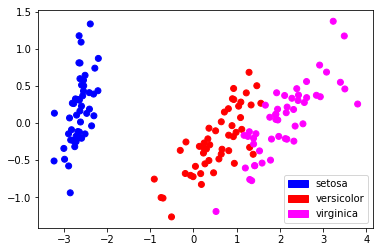

In [3]:
label_name = iris.target_names

from sklearn.decomposition import PCA
data = PCA(n_components=2).fit_transform(X)

color_label = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'magenta'}
y_label = [label_name[x] for x in y]
label_color = [color_label[x] for x in y_label]

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


plt.scatter(data[:, 0], data[:, 1], c=label_color)
team_patches = [mpatches.Patch(color=color, label=team) for team, color in color_label.items()]
plt.legend(handles=team_patches)
plt.show()

## K-means

* O algoritmo K-means é um método de clustering que tem por objetivo particionar n objetos em k grupos;
* Cada objeto pertence a um grupo. A atribuição de um ponto para um grupo pode ser dada por medidas de si/dissimilaridade (e.g. distância euclidiana), que busca calcular a distância entre um objeto e o centróide de cada grupo;
* Esse algoritmo requer um número k de clusters;
* Inicialmente é selecionado k objetos aleatórios como centróides de cada grupo;
* O algoritmo calcula a distância de cada objeto com todos os centróides, ao final dessa iteração os centróides de cada grupo serão recalculados;
* O novo centróide do grupo será calculado com base na média de todos os objetos atribuídos a ele;
* Esse processo é iterativo e converge quando nenhum ponto mudar de cluster.

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
print(kmeans) # modelo

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


#### Alguns parâmetros

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

n_clusters - quantidade de partições (clusters)
init - método de inicialização dos centróides (kmeans++ or random)
n_init - número de vezes que o algoritmo k-means será executado com diferentes "seeds" centróides

#### Alguns atributos

cluster_centers_ - lista de representantes (centróides) de cada grupo
labels_ - índice do cluster atribuído a cada objeto

#### Treinando o modelo e realizando a predição

In [5]:
kmeans.fit(X) # ajustando o modelo
y_pred_kmeans = kmeans.labels_

#### Visualizando resultados do agrupamento (K-means)

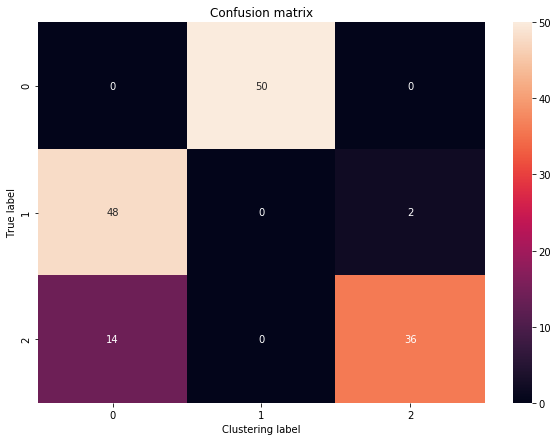

In [6]:
import sklearn.metrics
import seaborn as sns
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred_kmeans)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Clustering label')
plt.show()

#### Visualizando os centróides de cada grupo

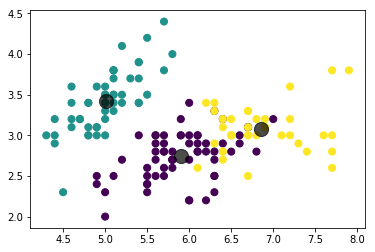

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

## Hierarchical Agglomerative Clustering

* Duas abordagens podem ser derivadas do clustering hierarquico: **top-down(divisivo) e bottom-up (aglomerativo)**. Nesta aula veremos o aglomerativo;
* Na abordagem bottom-up os dados são inicialmente distribuídos de modo que cada exemplo represente um cluster e, entao, esses clusters são recursivamente agrupados considerando alguma medida de similaridade, até que todos os exemplos pertençam a apenas um cluster;
* Para exemplificar, iremos verificar o funcionamento do algoritmo HAC
    * Defina um cluster para cada objeto;
    * Encontre os pares de cluster mais similares, de acordo com uma medida de distância escolhida;
    * Aglomere-os em um cluster maior e recalcule a distância deste cluster para todos os outros objetos;
    * Repita o item 2 e 3 até sobrar um único cluster.
* A grande vantagem do cluster hierárquico é que essa sequência de combinações (ou fusões) podem ser reconstruídas numa árvore, chamada de **dendrograma**. Essa estrutura permite tanto a visualização das amostras mais próximas, como também definir o número 'ideal' de clusters;
* A seguir iremos verificar uma implementação desse algoritmo e voltaremos a discutir dois principais conceitos: métricas de distâncias e dendograma.

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
distance = pdist(X, metric='cosine')
Z = linkage(distance, method='ward', metric='cosine')

O método **linkage** realiza o agrupamento, gerando um matriz Z de distância condensada

scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)

onde,


**y** - é um vetor de distância entre os pares de observações (pode ser calculado pela função pdist)
* 
**pdist** - Pairwise distances between observations in n-dimensional space (X, metric='euclidean', *args, **kwargs)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

**method** - método utilizado para computar a distância *d(s,t)* entre dois clusters (***s*** e ***t***); a lista de métodos e seus respectivos detalhes estão disponíveis em:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage


A matriz gerada (**Z**) representa um dendograma, onde o primeiro e o segundo elemento são os dois clusters aglomerados (fundidos) em cada passo, o terceiro elemento é a distância entre esses clusters, e o quarto elemento é o tamanho do novo cluster. Considere o primeiro elemento da matriz Z

[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00]

In [9]:
X[101], X[142] # os objetos são iguais, portanto a distância entre eles é 0

(array([5.8, 2.7, 5.1, 1.9]), array([5.8, 2.7, 5.1, 1.9]))

#### Visualizando o dendograma

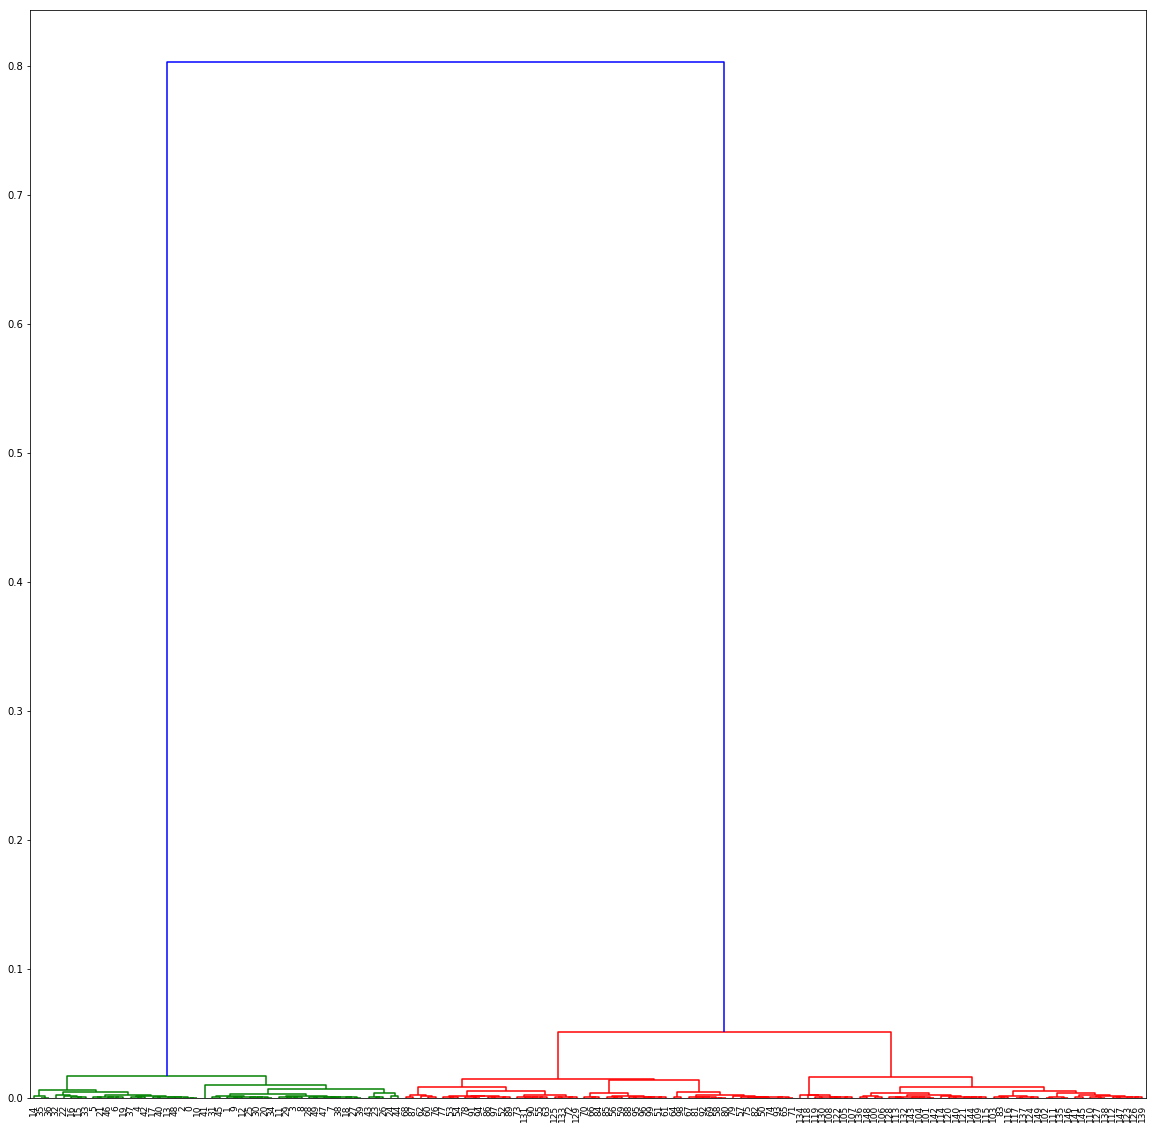

In [9]:
plt.figure(figsize=(20,20))
dn = dendrogram(Z,leaf_font_size=9)

O dendrograma é interpretado como a seguir. O diagrama é lido de baixo para cima. As linhas horizontais indicam a combinação de dois clusters. A altura dessa combinação (linha vertical) indica a distância (como computada acima) entre os dois clusters.

Algumas análises podem ser feitas, por exemplo:
* Os objetos 14 e 35 são mais próximos entre si que as amostras 32 e 15 - apesar dessas amostras estarem no mesmo clusters no "primeiro nível";
        from sklearn.metrics.pairwise import cosine_similarity
        cosine_similarity([X[14]], [X[35]])

* A visualização do dendograma permite que possamos definir um limiar para encontrarmos uma quantidade "k" de clusters (e.g. sabemos que nosso dataset pode ser agrupado em 3 clusters; nesse caso poderíamos definir o limiar 0.05 - uma vez que nesse nível da árvore os objetos estarão organizados em 3 grupos.

## Utilizando HAC para gerar os clusters

In [10]:
from scipy.cluster.hierarchy import cut_tree
clusters = cut_tree(Z,height=0.05) #0.05 cosine
y_pred_hac = clusters.flatten()

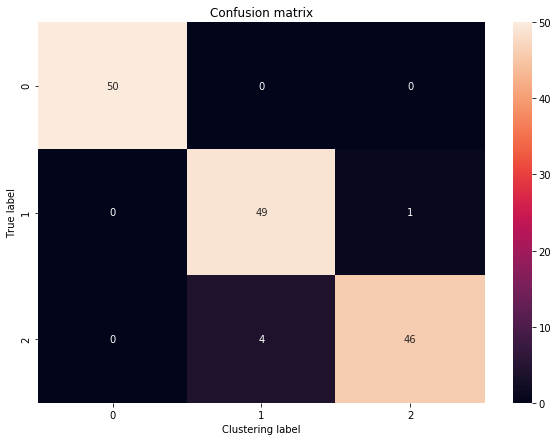

In [11]:
import sklearn.metrics
import seaborn as sns
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred_hac)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Clustering label')
plt.show()

## DBscan

* Density-Based Spatial Clustering of Aplication With Noise;
* Baseado em densidade, agrupando os pontos similares no espaço;
* Não é necessário especificar o número de clusters;
* Tenta encontrar os pontos que são separados por uma distância menor que um limiar (parâmetro importante!!);Def
* Funcionamento do algoritmo
    * Definir um limiar de distância;
    * Aleatoriamente o algoritmo escolhe um ponto e verifica qual o objeto com distancia inferior ao limiar definido; o objeto com menor distância é atribuído ao grupo;
    * O processo descrito anteriormente é repetido, tomando como base o último objeto atribuído ao grupo - caso nenhum objeto seja atribuído ao grupo o algoritmo seleciona aleatoriamente outro ponto para iniciar um novo cluster;
    * É possível que objetos não sejam atribuídos a nenhum grupo; quando isso ocorre chamamos de outlier;


* O desempenho do algoritmo é sensível ao parâmetro de distância - achar esse valor não é uma tarefa fácil.

In [12]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.8, metric='euclidean', min_samples=5).fit(X)
y_pred_dbscan = clustering.labels_

#### Principais parâmetros

* **eps** - The maximum distance between two samples for them to be considered as in the same neighborhood.

* **min_samples** - The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

* **metric** - The metric to use when calculating distance between instances in a feature array.

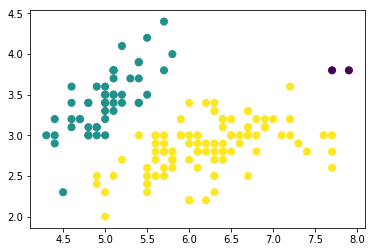

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_dbscan, s=50, cmap='viridis')

In [56]:
y_pred_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

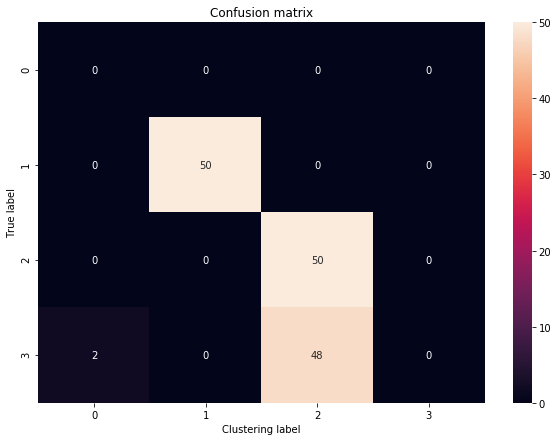

In [14]:
import sklearn.metrics
import seaborn as sns
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred_dbscan)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Clustering label')
plt.show()

## Métricas de Avaliação

* O processo de avaliação do resultado obtido a partir de um agrupamento é comumente chamado de **validação**;
* Entretanto, se estamos um processo não supervisionado como validar o resultado alcançado pelos algoritmos?
    * Espera-se de um cluster que ele possua duas principais características: seja homogêneo e isolado, ou seja, que o resultado do agrupamento *maximize a similaridade intragrupo* e *minimize a similaridade intergrupo*;
    * Existem algumas métricas que consideram essas características; nessa aula iremos discutir três métricas: V-Score, ARI e Silhouete Score (as duas primeiras métricas considera um conjunto P de partições conhecidas a priori, diferentemente da última).

#### V-score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html

v = 2 * (homogeneity * completeness) / (homogeneity + completeness) [0,1]

* Homogeneity - verifica se todos os objetos de um cluster pertence a mesma classe (rótulo)
* Completeness - verifica se todos os objetos de uma classe estão no mesmo cluster

In [17]:
from sklearn.metrics.cluster import v_measure_score

print('V-score K-means', v_measure_score(y, y_pred_kmeans))
print('V-score HAC', v_measure_score(y, y_pred_hac))
print('V-score DBScan', v_measure_score(y, y_pred_dbscan))

V-score K-means 0.7581756800057786
V-score HAC 0.8850620966553381
V-score DBScan 0.7174643320814477


#### Índice de Rand

IR = (A+D) / (A+B+C+D) [0, 1]

onde,
* A - quantidade de pares de objetos que pertencem a um mesmo grupo G e à uma mesma partição P;
* B - quantidade de pares de objetos que pertencem a um mesmo grupo G e às particições P diferentes;
* C - quantidade de pares de objetos que pertencem a grupos G diferentes e à mesma partição P;
* D - quantidade de pares de objetos que pertencem a grupos G diferentes e à partições diferentes.

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score

print('ARI K-means', adjusted_rand_score(y, y_pred_kmeans))
print('ARI HAC', adjusted_rand_score(y, y_pred_hac))
print('ARI DBScan', adjusted_rand_score(y, y_pred_dbscan))

ARI K-means 0.7302382722834697
ARI HAC 0.9037675791580496
ARI DBScan 0.5637510205230709
